In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [7]:
data=pd.read_csv("TSLA.csv")

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [9]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400
2955,2022-03-24,1009.729980,1024.489990,988.799988,1013.919983,1013.919983,22901900


In [15]:
print(data.isnull())

       Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
2951  False  False  False  False  False      False   False
2952  False  False  False  False  False      False   False
2953  False  False  False  False  False      False   False
2954  False  False  False  False  False      False   False
2955  False  False  False  False  False      False   False

[2956 rows x 7 columns]


In [19]:
print(data.fillna(0))

            Date         Open         High         Low        Close  \
0     2010-06-29     3.800000     5.000000    3.508000     4.778000   
1     2010-06-30     5.158000     6.084000    4.660000     4.766000   
2     2010-07-01     5.000000     5.184000    4.054000     4.392000   
3     2010-07-02     4.600000     4.620000    3.742000     3.840000   
4     2010-07-06     4.000000     4.000000    3.166000     3.222000   
...          ...          ...          ...         ...          ...   
2951  2022-03-18   874.489990   907.849976  867.390015   905.390015   
2952  2022-03-21   914.979980   942.849976  907.090027   921.159973   
2953  2022-03-22   930.000000   997.859985  921.750000   993.979980   
2954  2022-03-23   979.940002  1040.699951  976.400024   999.109985   
2955  2022-03-24  1009.729980  1024.489990  988.799988  1013.919983   

        Adj Close    Volume  
0        4.778000  93831500  
1        4.766000  85935500  
2        4.392000  41094000  
3        3.840000  25699000

In [23]:
data = data.fillna(data.mean(numeric_only=True))

In [25]:
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


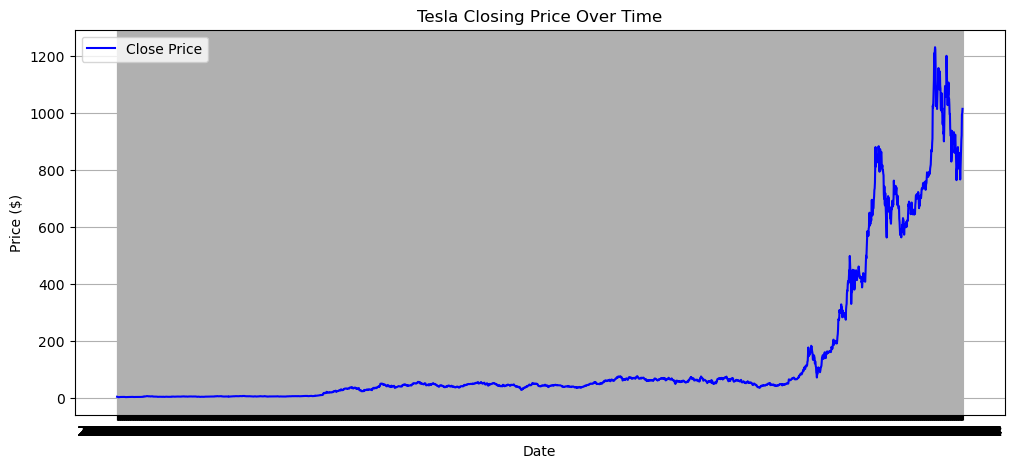

In [29]:
#plot1: closing price over time
plt.figure(figsize=(12, 5))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Tesla Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()
plt.show()

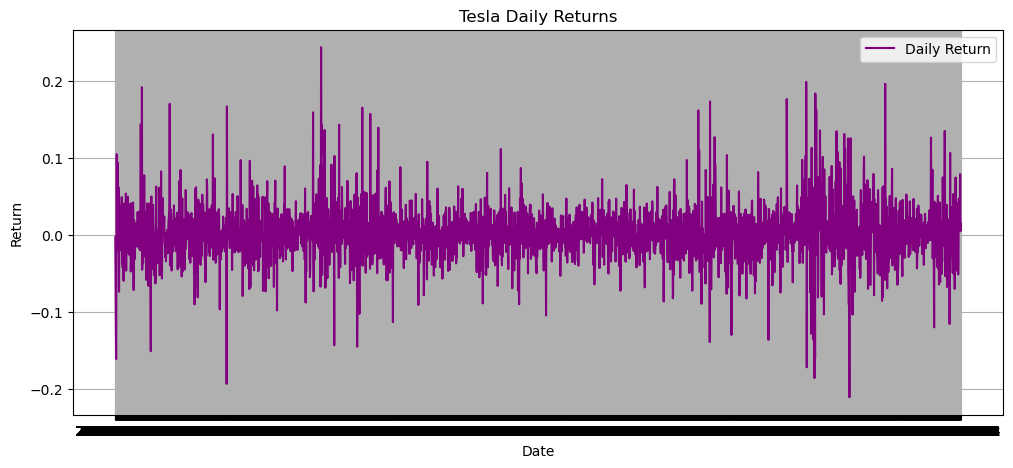

In [31]:
# Plot 2: Daily returns
data['Daily Return'] = data['Close'].pct_change()
plt.figure(figsize=(12, 5))
plt.plot(data['Date'], data['Daily Return'], label='Daily Return', color='purple')
plt.title('Tesla Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid()
plt.legend()
plt.show()

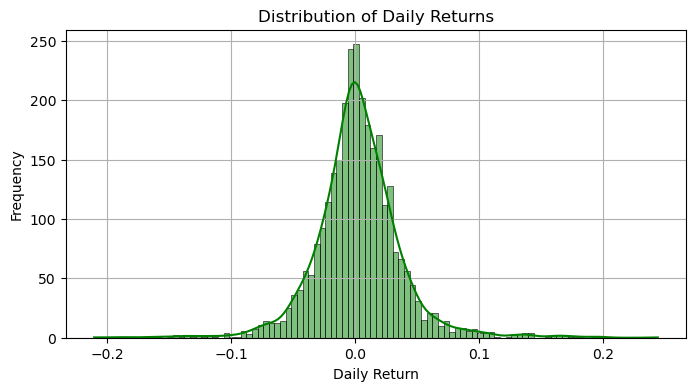

In [33]:

# Plot 3: Distribution of daily returns
plt.figure(figsize=(8, 4))
sns.histplot(data['Daily Return'].dropna(), bins=100, color='green', kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid()
plt.show()


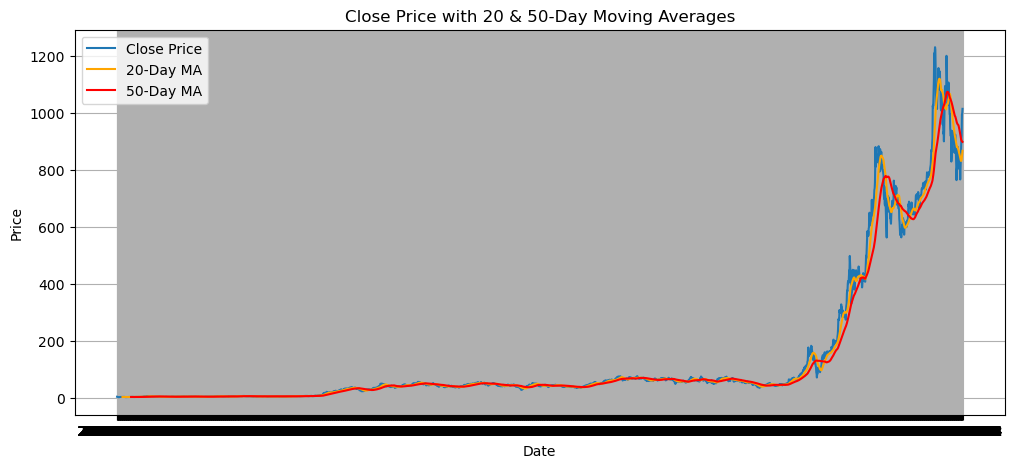

In [35]:
# Plot 4: Moving averages
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12, 5))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA20'], label='20-Day MA', color='orange')
plt.plot(data['Date'], data['MA50'], label='50-Day MA', color='red')
plt.title('Close Price with 20 & 50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


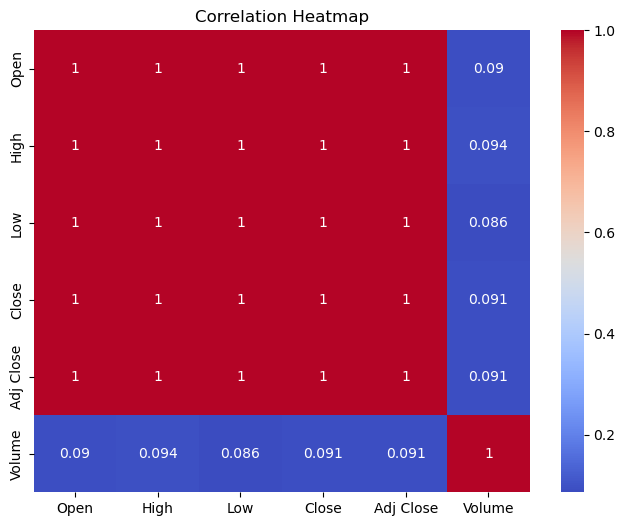

In [37]:
# Plot 5: Correlation heatmap
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Example actual and predicted
actual = np.array(['Up', 'Down', 'Up', 'Up', 'Down', 'Down', 'Up'])
predicted = np.array(['Up', 'Down', 'Down', 'Up', 'Down', 'Up', 'Up'])

cm = confusion_matrix(actual, predicted, labels=['Up', 'Down'])
print(cm)


[[3 1]
 [1 2]]


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('TSLA.csv')

# Display the first few rows
print(df.head())

# Display column info
print(df.info())


         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB
None


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Create a target column (1 if price went up, 0 if went down)
df['Price_Up_Down'] = (df['Close'] > df['Open']).astype(int)

# Step 2: Choose features
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Price_Up_Down']

# Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

# Step 5: Predict and Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5067567567567568

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.26      0.35       292
           1       0.51      0.74      0.60       300

    accuracy                           0.51       592
   macro avg       0.50      0.50      0.47       592
weighted avg       0.50      0.51      0.48       592



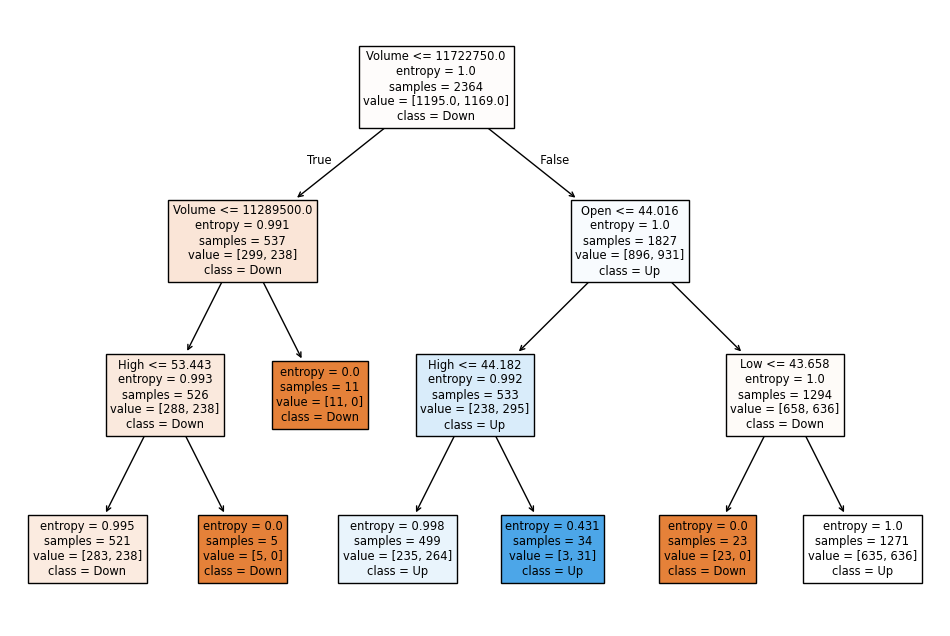

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=features, class_names=['Down', 'Up'], filled=True)
plt.show()


In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("TSLA.csv")  # Replace with your actual file path

# Select numerical features for PCA (excluding non-numeric columns)
numeric_features = df.select_dtypes(include=['number'])

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

# Apply PCA
pca = PCA(n_components=2)  # Adjust components as needed
principal_components = pca.fit_transform(scaled_data)

# Convert the principal components into a DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print(pca_df.head())  # View the transformed data


        PC1       PC2
0 -1.087977  2.291912
1 -1.095755  2.009733
2 -1.180502  0.409313
3 -1.212363 -0.140008
4 -1.202289  0.168511


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("TSLA.csv")

# Step 2: Create target column (1 if price went up, else 0)
df['Price_Up_Down'] = (df['Close'] > df['Open']).astype(int)

# Step 3: Select features and target
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Price_Up_Down']

# Step 4: Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train_scaled, y_train)

# Step 7: Make predictions
y_pred = knn.predict(X_test_scaled)

# Step 8: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4408783783783784

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.42      0.43       292
           1       0.45      0.46      0.45       300

    accuracy                           0.44       592
   macro avg       0.44      0.44      0.44       592
weighted avg       0.44      0.44      0.44       592



In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("TSLA.csv")

# Step 2: Create the target column (1 if Close > Open, else 0)
df['Price_Up_Down'] = (df['Close'] > df['Open']).astype(int)

# Step 3: Select features and target
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Price_Up_Down']

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Step 7: Predict and evaluate
y_pred = nb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 8: Print results
print("Naive Bayes Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Naive Bayes Accuracy: 0.49324324324324326

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.79      0.61       292
           1       0.50      0.20      0.29       300

    accuracy                           0.49       592
   macro avg       0.50      0.50      0.45       592
weighted avg       0.50      0.49      0.44       592



In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the dataset
df = pd.read_csv("TSLA.csv")

# Step 2: Create target column (1 if Close > Open, else 0)
df['Price_Up_Down'] = (df['Close'] > df['Open']).astype(int)

# Step 3: Select features and target
features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Price_Up_Down']

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Step 7: Predict
y_pred = rf.predict(X_test_scaled)

# Step 8: Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Random Forest Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Random Forest Accuracy: 0.6469594594594594

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.65       292
           1       0.66      0.64      0.65       300

    accuracy                           0.65       592
   macro avg       0.65      0.65      0.65       592
weighted avg       0.65      0.65      0.65       592



In [21]:
pip install yfinance pandas scikit-learn matplotlib

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --------------------------- ------------ 2.1/3.0 MB 29.1 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 22.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 77.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139098 sha256=b4e43880f2b315fd45569855f092d72e1fbd495095370ded69795c985d8aa280
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\1a\57\6a\bb71346381d0d911cd4ce3026f1fa720da76707e4f01cf27dd
Successfully buil

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Root Mean Squared Error (RMSE): 2.0423845828023466
R² Score: 0.999679082006728


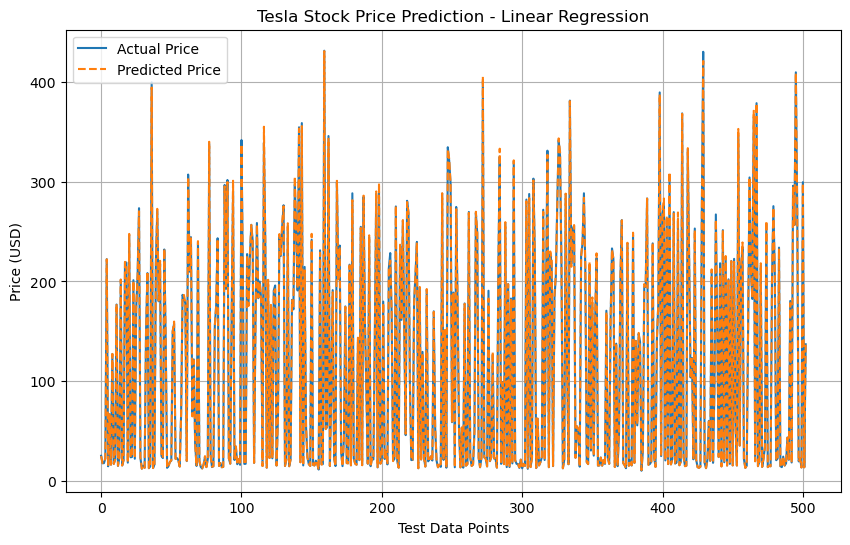

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fetch historical Tesla data
data = yf.download('TSLA', start='2015-01-01', end='2024-12-31')

# Use 'Open', 'High', 'Low', 'Volume' to predict 'Close'
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Prepare features and target
X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price', linestyle='--')
plt.title('Tesla Stock Price Prediction - Linear Regression')
plt.xlabel('Test Data Points')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()
